# Dynamics Module - Test 

## Due at Noon on the Tuesday after you receive it


You may use all Notes & Exercises (with answers) from class and the entirety of the internet to help you complete this assignment, but there is **ABSOLUTELY NO COLLABORATION PERMITTED**.
 
   
## Answering Instructions

- Some of the questions below require you to write some code; you will be principally graded on whether the results the code produces (plots, computations, etc.) are correct. But if the results are incorrect, and **if** you wrote clean intelligible code, you may salvage some points if the code is partially correct. (This won't work if your code is hard to follow.)

- Some of the questions require a written answer.  Where you are asked for handwritten math, you could try writing LaTeX in the notebook (for example, like this: $x = \begin{bmatrix}1 & 2 \\ 3 & 4 \end{bmatrix}$ ).  But most of you will be unfamiliar with the notation for doing that, and we're not expecting you to learn it. Alternatively, you could write it by hand on paper, take a picture of it with your phone, and include it here. 

For example, to include a jpg image from a file called `FirstName_LastName_Figure_1.jpg` in a markdown cell, and to make it 300 pixels wide, you would include in the markdown cell something like:

     <image src="FirstName_LastName_Figure_1.jpg" width=300>
     
and as a result you might get something like this:

<img src="Jane_TA_Figure_1.jpg" width=300>


 
## Submission Instructions
- Failure to follow submission instructions **EXACTLY** may result in a grade of **0**

- **No Late Submissions** without a Dean's Excuse, an assignment submitted after the due date may result in a grade of **0**

- Please send an email to the TA grader for this module, Mingyu Song, at `mingyus@princeton.edu` with the subject line:

> `[NEU_314_2017] FirstName LastName Assignment 3`

> For example, "[NEU_314_2017] Jane Smith Assignment 3"

- In the email, please attach **only** your completed notebook file **and** any image files you've added. Make sure you don't forget to include any image files that you've used! Files forgotten will count as files not made. The notebook should be renamed to have the filename:

> `FirstName_LastName_Assignment3.ipynb`

> For example, "Jane_Smith_Assignment3.ipynb"



- Please run the `Restart & Clear Output` option on your notebook before saving and sending your notebook (the grader will do this anyway if you don't)
 
 
### Maximum score is 35 points

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=1.75)
%matplotlib inline

# 1) One-dimensional dynamics

## 1a) Basic analysis of linear dynamics (5 pts)
Consider the equation

$$
\dot{x} = m x + p
$$

How many fixed points does this dynamical system have have? What is the fixed point, i.e., what is the value of $x$ at the fixed point?  What do you need to know in order to figure out whether the fixed point is stable or unstable?

It might help you to find the change to a new variable $y$ (in other words, write down an equation that specifies one-to-one relationship between x and the new variable $y$) such that the dynamics in $y$ are

$$
\dot{y} = m y
$$

## Solution 1a

The dynamical system $ \dot{x} = m x + p $ has only one fixed point. We can derive the fixed point by setting $ \dot{x} = 0$, such that:

> $ 0 = m x + p $

> $ mx = -p $

> $ x = -\frac{p}{m} $

where $p$ is a constant. To determine whether the fixed point is stable or unstable, we need to know the sign of the slope term, $m$. If $m$ is positive, then the fixed point is unstable; if $m$ is negative, then the fixed point is stable. We can demonstrate this analytically.

> $ \dot{x} = m x + p $

> $ \int \frac{dx}{mx + p} = \int 1 $

> $ \frac{1}{m}ln(mx + p) = t + c$

> $ ln(mx + p) = mt + mc$

> $ mx + p = e^{mt}e^{mc} $

> $ x = \frac{e^{mc}}{m}e^{mt} - \frac{p}{m}$

We set $c_0 = \frac{e^{mc}}{m}$, therefore we get:

> $ x = c_0 e^{mt} - \frac{p}{m}$

Based on the exponential above, we see that $x$ goes to infinity if $m > 0$, otherwise the system goes to the fixed point. 

We further demonstrate this empirically:

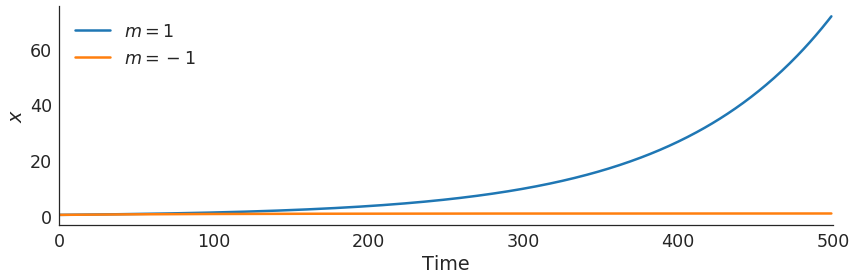

In [2]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define useful functions.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

def dxdt(x, m, p, dt=0.01):
    for i in np.arange(1, x.size): 
        dx = m * x[i-1] + p
        x[i] = x[i-1] + dx*dt
    return x

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Run simulation.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize x.
x = np.zeros(500)
x[0] = 0.5

## Simulate x with different slopes.
pos_m = dxdt(x.copy(), 1, 0)
neg_m = dxdt(x.copy(),-1, 1)

## Plot.
fig, ax = plt.subplots(1,1,figsize=(12,4))
ax.plot(pos_m, lw=2.5, label=r'$m=1$')
ax.plot(neg_m, lw=2.5, label=r'$m=-1$')
ax.set(xlim=(0,x.size), xlabel='Time', ylabel=r'$x$')
ax.legend(loc=2)

sns.despine()
plt.tight_layout()

## 1b) Membrane potential dynamics (5 pts)

The dynamics of the membrane potential of a typical neuron follow

$$
C \dot{V} = (E_\text{leak} - V) \frac{1}{R} + I_\text{input}
$$

where $I_{input}$ is an input current, $V$ is the membrane voltage, $C$ is the membrane capacitance, $E_{leak}$ is a constant (typically about -70 mV), and $R$ is the membrane resistance. For a typical neuron, $RC \approx 20$ ms.

Given a constant $I_{input}$, do these dynamics have a fixed point? If so, what is the voltage $V$ at that fixed point? Is that fixed point stable or unstable?

Let's call the voltage at that fixed point $V_0$.  If $V = V_0 + 0.010$ (that is, the voltage is 10 mV above the fixed point), how long does it take for $V$ to reach $V = V_0 + 0.002$? Does this time duration depend on the value of $I_{input}$?

## Solution 1b
### Part 1: Fixed Points
First we find the fixed point. We begin with the equation above:

> $ C \dot{V} = (E_\text{leak} - V) \frac{1}{R} + I_\text{input} $

and rearrange it to isolate $\dot{V}$:

> $ \dot{V} = (E_\text{leak} - V) \frac{1}{RC} + \frac{I_\text{input}}{C} $

At the fixed point, $\dot{V} = 0$:

> $ 0 = (E_\text{leak} - V) \frac{1}{RC} + \frac{I_\text{input}}{C} $

To solve for $V$:

> $ -\frac{1}{RC} (E_\text{leak} - V)  = \frac{I_\text{input}}{C} $

> $ E_\text{leak} - V = -\frac{RC \cdot I_\text{input}}{C} $

> $  -V = -E_\text{leak} -\frac{RC \cdot I_\text{input}}{C} $

> $  V = E_\text{leak} + \frac{RC \cdot I_\text{input}}{C} $

We plug in the values from above (and assume $C_m = 1$):

> $ V = -70 + 20 \cdot I_\text{input}$

From the equation above, we find that there are multiple fixed points conditioned on $I_\text{input}$. 

### Part 2: Stability and Analytic Solution
We can demonstrate the stability around the fixed point by integrating the differential equation. We begin as before (again assuming $C_m = 1$):

> $ \dot{V} = I_\text{input} - \frac{1}{RC}(V - E_\text{leak}) $

and integrate:

> $ \int \frac{dV}{I_\text{input} - \frac{1}{RC}(V - E_\text{leak})} = \int 1$

> $ -RC \cdot ln(I_\text{input} - \frac{1}{RC}(V - E_\text{leak})) = t + c$

> $ ln(I_\text{input} - \frac{1}{RC}(V - E_\text{leak})) = -\frac{t}{RC} - \frac{c}{RC} $

> $ I_\text{input} - \frac{1}{RC}(V - E_\text{leak}) = e^{-\frac{t}{RC}}e^{-\frac{c}{RC}} $

For simplicity, we substitute the constant $e^{-\frac{c}{RC}}$ as $A$:

> $ I_\text{input} - \frac{1}{RC}(V - E_\text{leak}) = Ae^{-\frac{t}{RC}} $

> $ \frac{1}{RC}(V - E_\text{leak}) = I_\text{input} - Ae^{-\frac{t}{RC}}$

> $ V - E_\text{leak} = RC \cdot ( I_\text{input} - Ae^{-\frac{t}{RC}}) $

> $ V = RC \cdot ( I_\text{input} - Ae^{-\frac{t}{RC}} ) + E_\text{leak} $

Now plug in values:

> $ V(t) = 20 \cdot ( I_\text{input} - Ae^{-\frac{t}{20}} ) - 70 $

Again we find that the exponential term is negative, such that it goes to zero as $t$ approaches infinity. As such, the system is stable around the fixed point.

We can also demonstrate this empirically.

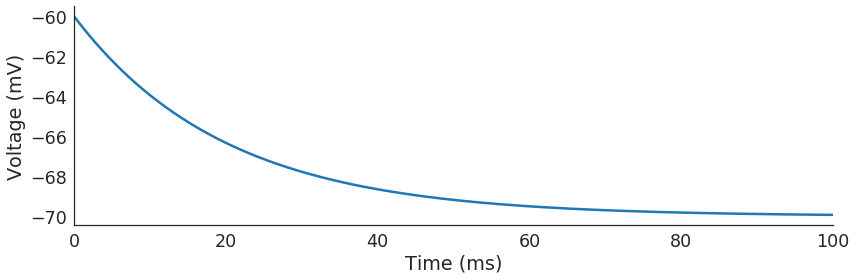

In [3]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define useful functions.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

def dVdt(V, I=0, E_leak=-70, RC=20, dt=0.1):
    for i in np.arange(1, V.size):
        dV = (E_leak - V[i-1]) / RC + I
        V[i] = V[i-1] + dV * dt
    return V

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Run simulation.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize V.
n_steps = 1001
V = np.zeros(n_steps)
V[0] = -60

## Simulate x with different slopes.
dt = 0.1
t = np.arange(n_steps) * dt
V = dVdt(V, dt=dt)

## Plot.
fig, ax = plt.subplots(1,1,figsize=(12,4))
ax.plot(t, V, lw=2.5)
ax.set(xlim=(t.min(), t.max()), xlabel='Time (ms)', ylabel='Voltage (mV)')

sns.despine()
plt.tight_layout()

### Part 3: Rate of Decay
Given a fixed point, $V_0$, we can use the analytic solution above to determine the time it takes for $V$ to decay from $V = V_0 + 0.010$ to $V = V_0 + 0.002$. Note that the rate of decay is solely dependent on the exponential term, which does not involve the input current, $I_\text{input}$. Thus, **the rate of decay is independent of the input current.**

According to our analytic solution above, the constant, $A$, varies according to the initial conditions. We can solve for $A$:

> $ V + 70 = 20 \cdot ( I_\text{input} - Ae^{-\frac{t}{20}} ) $

> $ \frac{V + 70}{20} = I_\text{input} - Ae^{-\frac{t}{20}} $

> $ Ae^{-\frac{t}{20}}  = I_\text{input} - \frac{V + 70}{20} $

> $ A = [I_\text{input} - \frac{V + 70}{20}] \ / \ e^{-\frac{t}{20}} $

At initial conditions, $ t=0 $, such that $ e^{-\frac{0}{20}} = 1$. Therefore:

> $ A = I_\text{input} - \frac{V + 70}{20} $

Thus, we can analytically calculate the length of time necessary for the voltage to decay from $V = V_0 + 10$ to $V = V_0 + 2$. In doing so, we demonstrate below that the rate of decay is independent of the current, $I$.

#### Example 1

To demonstrate solve the above when $I_\text{input} = 0$: 

> *[Fixed point]* $ V_0 = -70 + 20 \cdot I_\text{input} = -70 + 20 \cdot 0 = -70 $

> *[Initial voltage]* $ V_i = V_0 + 10 = -70 + 10 = -60 $

> *[Constant]* $ A = I_\text{input} - \frac{V_i + 70}{20} = 0 - \frac{-60 + 70}{20} = -0.5 $

Solve for $t$:

> $ V(t) = 20 \cdot ( I_\text{input} - Ae^{-\frac{t}{20}} ) - 70 $

> $ -70 + 2 = 20 \cdot ( 0 + 0.5e^{-\frac{t}{20}}) - 70 $

> $ -68 = 10e^{-\frac{t}{20}} - 70 $

> $ 2 = 10e^{-\frac{t}{20}} $

> $ 0.2 = e^{-\frac{t}{20}} $

> $ ln(0.2) = -\frac{t}{20} $

> $ t \approx 32.2 $

#### Example 2

To demonstrate solve the above when $I_\text{input} = 1$: 

> *[Fixed point]* $ V_0 = -70 + 20 \cdot I_\text{input} = -70 + 20 \cdot 1 = -50 $

> *[Initial voltage]* $ V_i = V_0 + 10 = -50 + 10 = -40 $

> *[Constant]* $ A = I_\text{input} - \frac{V_i + 70}{20} = 1 - \frac{-40 + 70}{20} = -0.5 $

Solve for $t$:

> $ V(t) = 20 \cdot ( I_\text{input} - Ae^{-\frac{t}{20}} ) - 70 $

> $ -50 + 2 = 20 \cdot ( 1 + 0.5e^{-\frac{t}{20}}) - 70 $

> $ -48 = 20 + 10e^{-\frac{t}{20}} - 70 $

> $ 2 = 10e^{-\frac{t}{20}} $

> $ 0.2 = e^{-\frac{t}{20}} $

> $ ln(0.2) = -\frac{t}{20} $

> $ t \approx 32.2 $

As is evident from the two examples above, the rate of decay is independent of $I_\text{input}$. We also show the independence of the rate of rate of decay empirically:

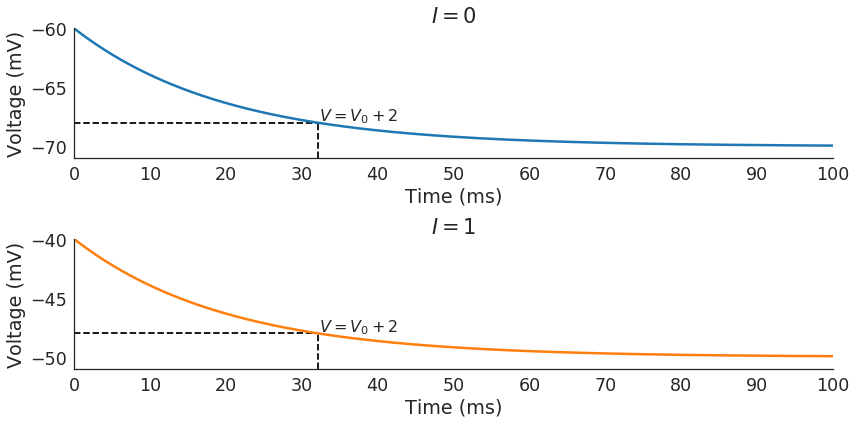

In [4]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define useful functions.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

def V_fixed(I, E_leak=-70, RC=20):
    return E_leak + RC * I

def A_solver(I, Vi, E_leak=-70, RC=20):
    return I - (Vi - E_leak) / RC

def V_analytic(t, I, Vi=-70, E_leak=-70, RC=20):
    A = A_solver(I, Vi, E_leak=E_leak, RC=RC)
    return RC * (I - A * np.exp(-t/RC)) + E_leak

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Run simulations.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define parameters.
t = np.linspace(0,100,1001)
I = [0, 1]

## Initialize canvas.
fig, axes = plt.subplots(2,1,figsize=(12,6))
colors = sns.color_palette(n_colors=2)

for i, ax in enumerate(axes):
    
    ## Solve for initial conditions.
    V0 = V_fixed(I[i])
    Vi = V0 + 10
    
    ## Simulate voltage.
    V = V_analytic(t, I[i], Vi=Vi)
    
    ## Plot.
    axes[i].plot(t, V, lw=2.5, color=colors[i])
    axes[i].hlines(V0+2, 0, 32.2, linestyle='--')
    axes[i].vlines(32.2, V0-1, V0+2, linestyle='--')
    axes[i].text(32.3, V0+2.2, r'$V=V_0 + 2$', fontsize=16)
    axes[i].set(xlim=(t.min(), t.max()), xticks=np.arange(0,101,10), xlabel='Time (ms)',
                ylim=(V0-1, Vi), ylabel='Voltage (mV)', title=r'$I=%s$' %I[i])
    
sns.despine()
plt.tight_layout()

# 2) Oscillations (10 pts)

Your housemate Jane Smith is working with a two-dimensional dynamical system (let's call the two dimensions $x$ and $y$). She's linearized around a fixed point of interest, found the eigenvalues and eigenvectors, but is dismayed to find they are complex. She knows you took NEU 314, so she comes to you and asks

> "these eigenvalues are $\lambda_1 = -2.3 + i 6.2~$ and $~\lambda_2 = -2.3 - i 6.2$.  What does this mean? Is my fixed point stable or unstable?" 

What should you tell her and why?

Focusing just on the linearized dynamics, she then tells you that the fixed point she's interested in is at position $(x_0, y_0)$. She's interested in what happens when the system starts from a position $(x,y)$ that is a squared distance away from the fixed point $r^2 = (x-x_0)^2 + (y-y_0)^2 = 16$. Does the system ever get to a squared distance $r^2=4$, and if so, how long would it take it to go from $r^2=16$ to $r^2=4$?

## Solution 2 (part 1)
Insofar that the real portions of the eigenvalues are negative (i.e. -2.3, -2.3), the fixed points are stable. 

## Solution 2 (part 2)

# 3) Multi-dimensional linear dynamics

You are investigating how activity evolves in a network of two groups of neurons $x$ and $y$, that interact with each other through the equations

$$
\begin{align*}
\dot{x} &= \left(3+\frac{5}{6}\right) \cdot x \; - \; \frac{5}{3} y \\
\dot{y} &= \frac{5}{3} x \; - \; \frac{1}{3} y
\end{align*}
$$

## 3a)  (5 pts)

If at $t=0$ you start the system at 
$$
\begin{bmatrix}x \\ y \end{bmatrix} \; = \; \begin{bmatrix}1 \\ 2 \end{bmatrix}
$$

How long does it take for the distance to the origin $\sqrt{x^2 + y^2}$ to change by a factor of $e$? Did that distance shrink (i.e., it got divided by $e$) or grow (it got multiplied by $e$).

What if the system had started at 
$$
\begin{bmatrix}x \\ y \end{bmatrix} \; = \; \begin{bmatrix}2 \\ 1 \end{bmatrix}?
$$

How long does it take for _that_ distance to the origin to change by a factor of $e$, and is it shrinking or growing?

_Hint: it might help you to remember that **when in doubt, diagonalize**._

### Solution 3a
In matrix form, the system is equivalent to $X' = AX$ with $A = \begin{bmatrix}3 + \frac{5}{6} & -\frac{5}{3} \\ \frac{5}{3} & -\frac{1}{3} \end{bmatrix}$. 

The eigenvectors of A are found with $\begin{bmatrix}3 + \frac{5}{6} - \lambda & -\frac{5}{3} \\ \frac{5}{3} & -\frac{1}{3} - \lambda \end{bmatrix}$. This works out to: 

> $ (\lambda - 3 - \frac{5}{6})(\lambda + \frac{1}{3}) - (\frac{5}{3})(-\frac{5}{3}) $

which simplifies to:

> $ (x - \frac{23}{6})(x + \frac{1}{3}) + \frac{25}{9} $

and eventually:

> $ \frac{1}{2}(2x - 1)(x - 3) $

such that the eigenvalues are $\lambda_1 = 3$ and $\lambda_2 = 0.5$.

We can then solve for the eigenvectors:

** Eigenvector 1 **

> $ = \begin{bmatrix}3 - 3 - \frac{5}{6} & \frac{5}{3} \\ -\frac{5}{3} & 3 + \frac{1}{3} \end{bmatrix}$ 

> $ = \begin{bmatrix}-\frac{5}{6} & \frac{5}{3} \\ -\frac{5}{3} & \frac{10}{3} \end{bmatrix}$ 

> $ = \begin{bmatrix}-\frac{5}{6} & \frac{5}{3} \\ 0 & 0 \end{bmatrix}$ 

which becomes $ -\frac{5}{6}x_1 + \frac{5}{3}y_1 = 0$ such that $x_1 = 2$ and $y_1 = 1$.

** Eigenvector 2 **

> $ = \begin{bmatrix} \frac{1}{2} - 3 - \frac{5}{6} & \frac{5}{3} \\ -\frac{5}{3} & \frac{1}{2} + \frac{1}{3} \end{bmatrix}$ 

> $ = \begin{bmatrix} -\frac{10}{3} & \frac{5}{3} \\ -\frac{5}{3} & \frac{5}{6} \end{bmatrix}$ 

> $ = \begin{bmatrix} -\frac{10}{3} & \frac{5}{3} \\ 0 & 0 \end{bmatrix}$ 

which becomes $ -\frac{10}{3}x_2 + \frac{5}{3}y_2 = 0$ such that $x_2 = 1$ and $y_2 = 2$.

** Final Solution **

We know that the integral of $\dot{y} = \Lambda y $ evaluates to $ y(t) = y_0e^{\Lambda t}$, where $\Lambda$ is a diagonal matrix with the eigenvalues as the diagonal. Thus, if we include the transform matrix $\nu$, we arrive at:

> $ \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} 2e^{3t} & e^{0.5t} \\ e^{3t} & 2e^{0.5t} \end{bmatrix} \begin{bmatrix} x_0 \\ y_0 \end{bmatrix} $

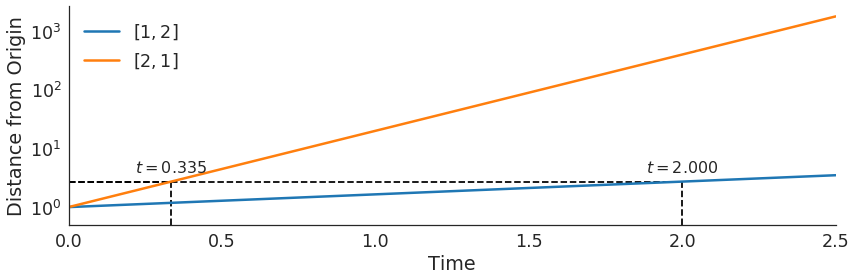

In [5]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define useful functions.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

def dXYdt(t, A, xy=False):
    
    ## Initialize.
    dt = np.diff(t)
    XY = np.zeros((t.size, 2))
    if np.any(xy): XY[0] = xy
        
    ## Compute.
    for i in np.arange(1, t.size):
        dxdy = A.dot(XY[i-1])
        XY[i] = XY[i-1] + dxdy * dt[i-1]
    
    return XY

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Run simulation.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define parameters.
t = np.linspace(0,2.5,1001) 
A = np.array([[ 3 + 5/6, -5/3 ], [ 5/3, -1/3 ]])
starting_points = [[1,2],[2,1],] 

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))

for xy in starting_points:

    ## Simulate dynamics.
    XY = dXYdt(t, A, xy=xy)

    ## Compute distance from origin.
    distance = np.linalg.norm(XY,axis=1)
    distance /= distance[0]
    
    ## Find nearest point to e.
    ix = np.argmin(np.power(distance - np.exp(1), 2))
    
    ## Plot.
    ax.plot(t, distance, lw=2.5, label=r'$[%s,%s]$' %(xy[0],xy[1]))
    ax.hlines(np.exp(1), t[0], t[ix], linestyle='--')
    ax.vlines(t[ix], 0.5, np.exp(1), linestyle='--')
    ax.text(t[ix], 4, r'$t = %0.3f$' %t[ix], ha='center', fontsize=16)
    
## Add information.
ax.set(xlim=(t.min(), t.max()), xlabel='Time', ylim=(0.5,2.6e3), yscale='log', ylabel='Distance from Origin')
ax.legend(loc=2)

sns.despine()
plt.tight_layout()

## 3b)  (5 pts)

If you diagonalized for **3a**, you will already have done this, but if you haven't yet, write down the matrix $M$ such that the dynamics above in vector and matrix form are described by

$$
\dot{\bf x} = M \cdot {\bf x}
$$



In Python, numerically simulate the dynamical equations above using Euler integration:
$$
{\bf x}(t + \Delta t) \; \approx \; {\bf x}(t) \, + \, \Delta t \cdot \frac{{\rm d}{\bf x}}{{\rm d}t}
$$
Plot, using blue, green, and red, respectively, the traces from $t=0$ to $t=2.5$ for the following three starting points:

$$
\begin{bmatrix}1 \\ 2 \end{bmatrix} \; {\rm ~and~} \; \begin{bmatrix}2 \\ 1 \end{bmatrix} \; {\rm ~and~} \; \begin{bmatrix}1 \\ 0.9 \end{bmatrix}
$$

One simple way to plot would be to add, at each step of the iteration, a point for the value of ${\bf x}$ at that iteration. For example,

```python
plt.figure()
# initialize x1, x2, and x3
dt = 0.02 # timestep
for i in np.arange(0, 2.5, dt):

    # place here your code to compute the next iteration 
    # and update the vectors x1, x2, and x3
    
    plt.plot(x1[0], x1[1], "b.") 
    plt.plot(x2[0], x2[1], "g.") 
    plt.plot(x2[0], x3[1], "r.") 
```

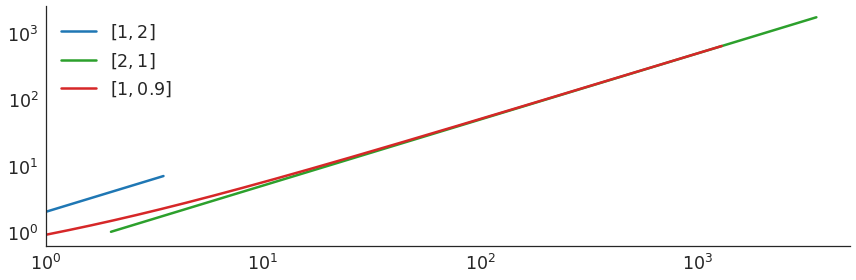

In [6]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define useful functions.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

def dXYdt(t, A, xy=False):
    
    ## Initialize.
    dt = np.diff(t)
    XY = np.zeros((t.size, 2))
    if np.any(xy): XY[0] = xy
        
    ## Compute.
    for i in np.arange(1, t.size):
        dxdy = A.dot(XY[i-1])
        XY[i] = XY[i-1] + dxdy * dt[i-1]
    
    return XY

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Run simulation.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define parameters.
t = np.linspace(0,2.5,1001) 
A = np.array([[ 3 + 5/6, -5/3 ], [ 5/3, -1/3 ]])
starting_points = [[1,2],[2,1],[1,0.9]] 

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))
colors = ['#1f77b4', '#2ca02c', '#d62728']

for xy, color in zip(starting_points, colors):

    ## Simulate dynamics.
    XY = dXYdt(t, A, xy=xy)

    ## Plot.
    ax.plot(*XY.T, lw=2.5, label=r'$[%s,%s]$' %(xy[0],xy[1]), color=color)
    
## Add information.
ax.legend(loc=2)
ax.set(xlim=(1e0, 5e3), xscale='log', yscale='log')

sns.despine()
plt.tight_layout()

## 3c)  (5 pts)

Use `numpy` to compute the eigenvectors and eigenvalues of $M$. Let $V$ be the matrix with eigenvectors as columns.

For each value of ${\bf x}$, there is a corresponding point in the eigenspace, given by $~{\bf y} = V^{-1} {\bf x}$.

In a new figure, plot the traces for the values of ${\bf y}$ that correspond to the blue, green, traces that you plotted in **3b**.  You may wish to use `plt.xlim()` and `plt.ylim()` to ensure that al your data points are clearly visible.


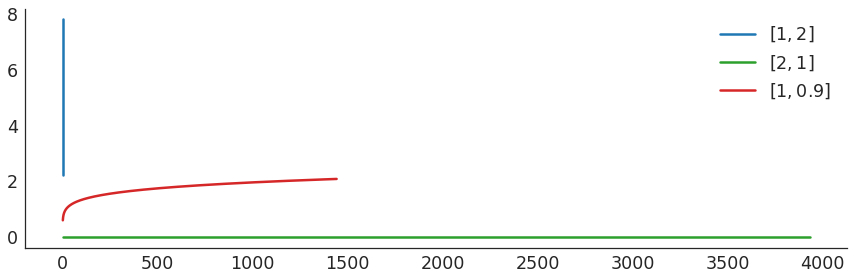

In [7]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Run simulation.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define parameters.
t = np.linspace(0,2.5,1001) 
A = np.array([[ 3 + 5/6, -5/3 ], [ 5/3, -1/3 ]])
starting_points = [[1,2],[2,1],[1,0.9]] 

## Perform eigendecomposition.
u, V = np.linalg.eig(A)
Vinv = np.linalg.inv(V)

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))
colors = ['#1f77b4', '#2ca02c', '#d62728']

for xy, color in zip(starting_points, colors):

    ## Simulate dynamics.
    XY = dXYdt(t, A, xy=xy)

    ## Transform into eigenspace.
    f = lambda a, b: b @ a
    XY_prime = np.apply_along_axis(f, 1, XY, Vinv)
    
    ## Plot.
    ax.plot(*XY_prime.T, lw=2.5, label=r'$[%s,%s]$' %(xy[0],xy[1]), color=color)
    
## Add information.
ax.legend(loc=1)

sns.despine()
plt.tight_layout()